<a href="https://colab.research.google.com/github/ADC1811/CODSOFT/blob/main/Task1CodSoft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
df=pd.read_csv("/content/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.shape

(418, 12)

<Axes: xlabel='Survived', ylabel='count'>

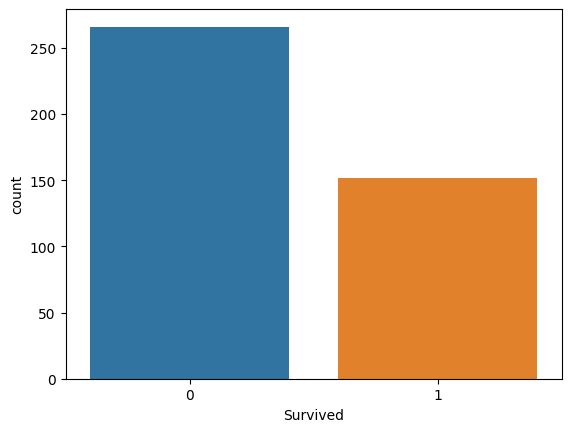

In [ ]:
sns.countplot(x="Survived", data=df)
#as seen in the below plot more than 250 passengers have survived whereas nearly 150 passengers not survived

<Axes: xlabel='Survived', ylabel='count'>

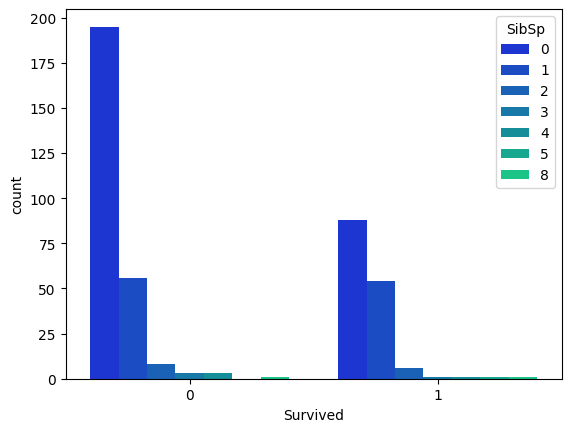

In [ ]:
sns.countplot(x='Survived', hue='SibSp', data=df, palette='winter')

<Axes: xlabel='Survived', ylabel='count'>

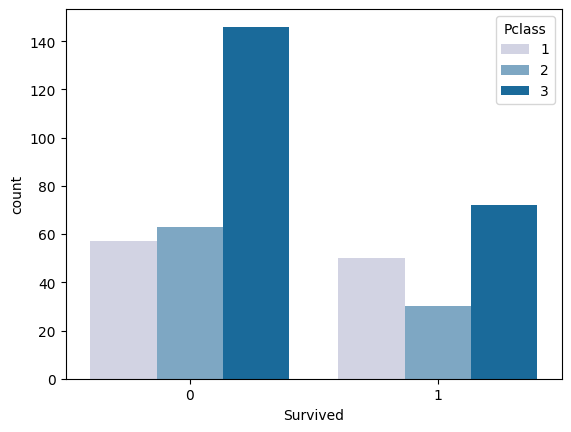

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='PuBu')

<Axes: ylabel='Frequency'>

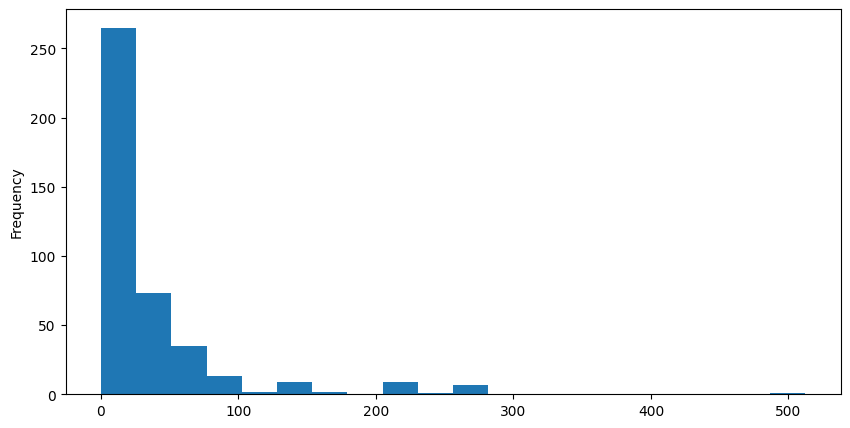

In [ ]:
df['Fare'].plot.hist(bins=20, figsize=(10,5))

<Axes: ylabel='Frequency'>

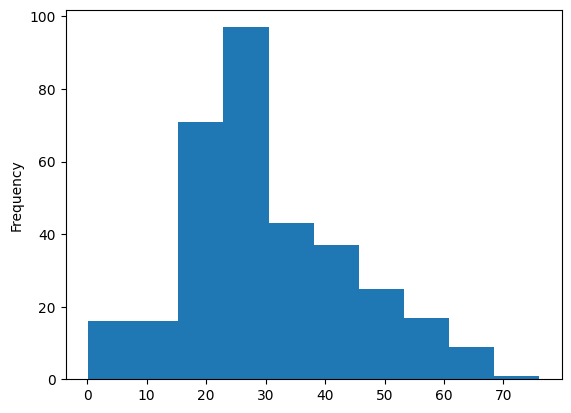

In [ ]:
df['Age'].plot.hist()

<Axes: xlabel='Parch', ylabel='count'>

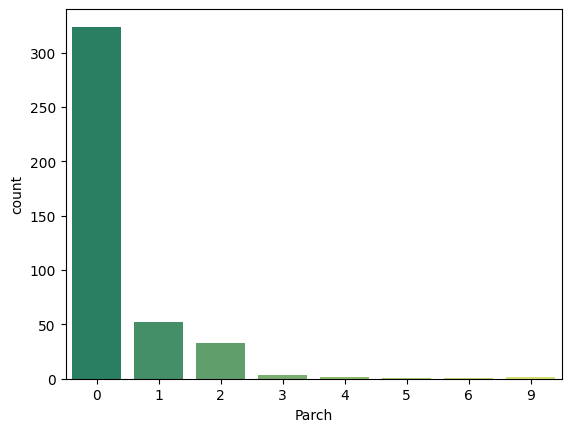

In [ ]:
sns.countplot(x='Parch', data=df, palette='summer')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

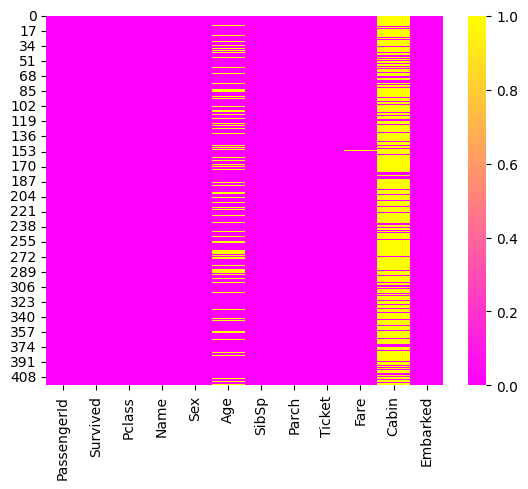

In [ ]:
sns.heatmap(df.isnull(), cmap='spring')

<Axes: xlabel='Pclass', ylabel='Age'>

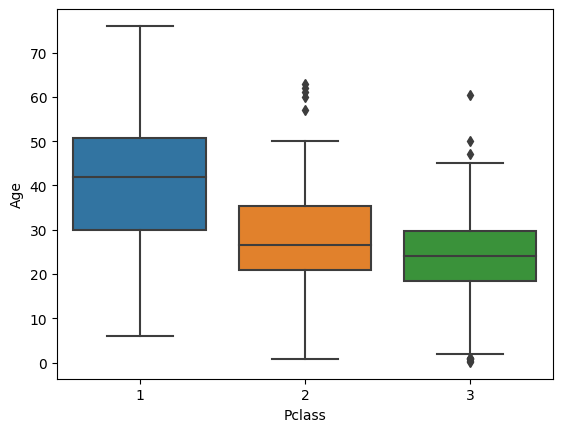

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
pd.get_dummies(df['Sex']).head()

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [ ]:
s=pd.get_dummies(df['Sex'], drop_first=True)
s.head(3)

,male
0,1
1,0
2,1


In [ ]:
pd.get_dummies(df['Embarked']).head()

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [ ]:
e=pd.get_dummies(df['Embarked'], drop_first=True)
e.head(3)

,Q,S
0,1,0
1,0,1
2,1,0


In [ ]:
df=pd.concat([df, s, e], axis=1)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,male,Q,S,male,Q,S
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,1,1,0,1,1,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,0,1,0,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,1,0,1,1,0


In [ ]:
df.drop(['Name', 'PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis=1, inplace=True)

In [ ]:
df.head(3)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,male,Q,S,male,Q,S
0,0,34.5,0,0,7.8292,1,1,0,1,1,0,1,1,0
1,1,47.0,1,0,7.0000,0,0,1,0,0,1,0,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,1,0,1,1,0


In [ ]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [ ]:
# Create the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM model using the training data
svm_model.fit(X_train_imputed, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_imputed)

# Calculate accuracy of the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy: {:.2f}%".format(accuracy_svm * 100))


SVM Accuracy: 100.00%
